# Teorema de Sarkovskii
###### Yamamoto Yuriko

Ordenamiento de Sarkovski:
Impares
Doble de Impares
Cuádruple
. . .
Potencias de 2 y 1

$3$      >  $5$     >  $7$     > ... >  $n$     >  ...   
$2(3)$    > $2(5)$    > $2(7)$    > ... > $2(n)$    > ...   
$2^2(3)$ > $2^2(5)$> $2^2(7)$> ... > $2^2(n)$> ...     
$2^3(3)$> $2^3(5)$> $2^3(7)$> ... > $2^3(n)$> ...    
. . .  
... > $2^n$ >... > $2^4$ > $2^3$ > $2^2$ > $2$ > $1$

### Teorema de Sarkovski

Sea $I$ un intervalo en $R$. Sean $n$ y $k$ números naturales tal que $n$ precede a $k$.  
Supongamos $F: I \longrightarrow I$ continua que tiene un punto periódico de periodo $n$, entonces   
$F$ también tiene un punto periódico de periodo $k$.

### Teorema de Li-Yorke

Periodo 3 implica caos.  

El teorema de Li-Yorke es un caso particular del teorema de Sarkovskii.  
Pues tener un punto periodico de periodo 3 implica tener puntos de todos los periodos.

In [1]:
using Plots, LaTeXStrings

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
"""
La función func(f::Function) crea un vector 'x' con condiciones iniciales en un intervalo y un vector 'y' que 
contiene la evaluación de 'x' bajo la función f.
"""

function func(f::Function) 

    
    x = collect(linspace(0.0, 50.0, 500))
    y = Float64[]
    n = length(x)
    
    
    for i in 1:n
        
        fy = f(x[i])
                   
        push!(y,fy)
    end
    return x,y
    
    
end

func (generic function with 1 method)

In [4]:
"""
    La función functit(f::Function, x_0::Float64, n::Int64), con parámetros f, x_0 y n, regresa los arreglos vx y vy 
que contienen las n iteraciones de los valores de x y f(x) respectivamente. 

"""

function functit(f::Function, x_0::Float64, n::Int64) 
    
    y = f(x_0)
        
    vx = Float64[]
    vy = Float64[]
    
    push!(vx,x_0)
    push!(vy,y)
    
    for i in 1:n
        push!(vx,y)
            y = f(y)
                   
        push!(vy,y)
    end
    return vx,vy
    
end

functit (generic function with 1 method)

In [5]:
"""
    La función orb(f::Function, x0::Float64, n::Int64), con parámetros f, x0 y n, regresa los arreglos ox y oy 
que contiene la órbita que sigue la condición inicial x0 al aplicarle f. 

"""


function orb(f::Function, x0::Float64, n::Int64)
    
    ox = Float64[]
    oy = Float64[]
    
    push!(ox, x0)
    push!(oy, 0)

    for i in 1:n
        
       
        push!(ox, x0)
        y = f(x0)
        push!(oy, y)
        
        push!(ox,y)
        push!(oy,y)
        x0 = y
    end
    
        return ox, oy
end

orb (generic function with 1 method)

In [6]:
"""
La función raiz_cuadrática(a::Real, b::Real, c::Real), regresa las raíces de una función con coeficientes a, b y c. 

"""

function raiz_cuadrática(a::Real, b::Real, c::Real)
    
    #Definimos el discriminante
    d = (b^2) - 4(a*c)

    #Condiciones
    if a == 0.0 
        print("La ecuación no es cuadrática.")
    end
    
    if d == 0.0
        x1 = x2 = -b/2a
    end
    
    if d > 0
        x1 = (-b + sqrt(d))/2a
        x2 = (-b - sqrt(d))/2a
    end
    
    if d < 0 
        e = sqrt(abs(d)) * im
        x1 = (-b + e)/2a
        x2 = (-b - e)/2a 
    end
            
    return "Las raíces son x1 = $x1 y x2 = $x2"
    
end

raiz_cuadrática (generic function with 1 method)

In [7]:
#Función que crea funciones lineales por partes

"""
La función functlin(m::Int64, x::Float64), crea una función lineal por partes cuyo dominio es [1,2*m + 1].

"""

function functlin(m::Int64, x::Float64)
    
    I = 2*m + 1

    if x <= m && x >= 1 # [1,m]
        return 2*m + 2 - x
        
        elseif x >= m && x <= m+1 #[m, m+1]
            return -2*(x - m) + (m + 2)
            
            elseif x >= m+1 && x <= 2*m #[m+1,2m]
                return -(x - (m + 1)) + m
        
            elseif x >= 2*m && x <= 2*m + 1 #[2m, 2m+1]
                    return m*(x - 2*m) + 1
                    
                    else
                        println("x está fuera de rango 1:",I)

    end
end



functlin (generic function with 1 method)

In [8]:
""" 
Función graphit(m:: Int64, p::Int64, j::Int64) donde m define el rango, p es el número de puntos donde se evalúa 
la función y j es el número de veces que se aplica la función.
"""

function graphit(m::Int64, p::Int64, j::Int64)
    
    vectx = collect(linspace(1.0, 2*m + 1, p))
    vecty = zeros(vectx)
    
    
    if j == 1
        for i in 1:p
            vecty[i] = functlin(m,vectx[i])
        end
        
    elseif j == 2
        for i in 1:p
            vecty[i] = functlin(m,functlin(m,vectx[i]))
        end
        
        elseif j == 3
            for i in 1:p
                vecty[i] = functlin(m,functlin(m,functlin(m,vectx[i])))
            end
                
        elseif j == 4 
            for i in 1:p
                vecty[i] = functlin(m,functlin(m,functlin(m,functlin(m,vectx[i]))))
            end
               
        elseif j == 5
            for i in 1:p
                 vecty[i] = functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,vectx[i])))))
            end
        
        elseif j == 6
            for i in 1:p
                vecty[i] = functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,vectx[i]))))))
            end
        
        else j == 7
            for i in 1:p
                vecty[i] = functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,functlin(m,vectx[i])))))))
            end
    end
     
        
    return vectx, vecty
end
    

graphit (generic function with 1 method)

In [9]:
#Función prueba que crea funciones que a su vez crea funciones lineales a cachos

function functlinpr(m::Int64)
    
    I = 2*m + 1
    
    return function Fm(x::Float64)
        
if x <= m && x >= 1 # [1,m]
        return 2*m + 2 - x
        
        
        elseif x >= m && x <= m+1 #[m, m+1]
            return -2*(x - m) + (m + 2)
            
            elseif x >= m+1 && x <= 2*m #[m+1,2m]
                return -(x - (m + 1)) + m
        
            elseif x >= 2*m && x <= 2*m + 1 #[2m, 2m+1]
                    return m*(x - 2*m) + 1
                    
                    else
                        println("x está fuera de rango 1:",I)
        end




    
    end
end




functlinpr (generic function with 1 method)

In [10]:
#Prueba de functlinpr
f2=functlinpr(2)

Fm (generic function with 1 method)

In [11]:
#Prueba de la segunda parte de la función functlinpr 
f2(1.0)

5.0

In [12]:
f5=functlinpr(5)

Fm (generic function with 1 method)

In [13]:
f5(1.0)

11.0

In [14]:
#Prueba de la función funct
functlin(2, 6.0)

x está fuera de rango 1:5


In [15]:
#Prueba de la función funct
functlin(3, 5.0)

2.0

In [16]:
#Función id
(xi,yi)=func(x->x);

#### Funciones

In [17]:
?functlin

search: functlin functlinpr functionloc functionlocs



La función functlin(m::Int64, x::Float64), crea una función lineal por partes cuyo dominio es [1,2*m + 1].


In [18]:
?graphit

search: graphit graphemes isgraph



Función graphit(m:: Int64, p::Int64, j::Int64) donde m define el rango, p es el número de puntos donde se evalúa  la función y j es el número de veces que se aplica la función.


In [19]:
#Función que crea funciones lineales por partes

"""
La función functlin(m::Int64, x::Float64), crea una función lineal por partes cuyo dominio es [1,2*m + 1].

"""

function functlin(m::Int64, x::Float64)
    
    I = 2*m + 1

    if x <= m && x >= 1 # [1,m]
        return 2*m + 2 - x
        
        elseif x >= m && x <= m+1 #[m, m+1]
            return -2*(x - m) + (m + 2)
            
            elseif x >= m+1 && x <= 2*m #[m+1,2m]
                return -(x - (m + 1)) + m
        
            elseif x >= 2*m && x <= 2*m + 1 #[2m, 2m+1]
                    return m*(x - 2*m) + 1
                    
                    else
                        println("x está fuera de rango 1:",I)

    end
end




functlin (generic function with 1 method)

### Periodo 5 *no* implica periodo 3

Se usa $m = 2$, el rango entonces será $I=[1,2m + 1]$,   
es decir, $I=[1,5]$

In [20]:
#Vector
(vx,vy) = graphit(2, 1000, 1)

([1.0,1.004,1.00801,1.01201,1.01602,1.02002,1.02402,1.02803,1.03203,1.03604  …  4.96396,4.96797,4.97197,4.97598,4.97998,4.98398,4.98799,4.99199,4.996,5.0],[5.0,4.996,4.99199,4.98799,4.98398,4.97998,4.97598,4.97197,4.96797,4.96396  …  2.92793,2.93594,2.94394,2.95195,2.95996,2.96797,2.97598,2.98398,2.99199,3.0])

[Plots.jl] Initializing backend: pyplot



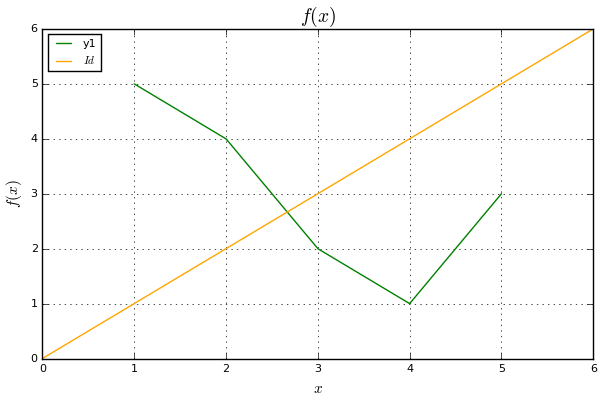

In [21]:
#Gráfica m=2
plot(vx, vy, c=:green, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

In [22]:
functlin(2,functlin(2,functlin(2,functlin(2,functlin(2,1.0)))))

1.0


$f(1)=5 \rightarrow f(5)=3 \rightarrow f(3)=2 \rightarrow f(2)=4 \rightarrow f(4)=1$

Es una órbita de periodo 5.

Tiene 1 punto fijo.

In [23]:
functlin(2,functlin(2,functlin(2,functlin(2,functlin(2,3.0)))))

3.0

In [24]:
functlin(2,functlin(2,functlin(2,functlin(2,functlin(2,5.0)))))

5.0

Ahora queremos mostrar que no tiene puntos de periodo 3. Para eso analizamos cada intervalo.

In [25]:
# Intervalo [1,2]


In [26]:
#Aplicando 3 veces f al intervalo [1,2]

(f3x,f3y) = (functlin(2,functlin(2,functlin(2,1.0))),functlin(2,functlin(2,functlin(2,2.0))))

(2.0,5.0)

Entonces no puede existir un punto de periodo 3 en [1,2]

In [27]:
# Intervalo [3,4]
(functlin(2,functlin(2,functlin(2,3.0))),functlin(2,functlin(2,functlin(2,4.0))))

(1.0,3.0)

In [28]:
# Intervalo [4,5]
(functlin(2,functlin(2,functlin(2,4.0))),functlin(2,functlin(2,functlin(2,5.0))))

(3.0,4.0)

Entonces no puede existir un punto de periodo 3 en [3,4] ni en [4,5]

In [29]:
# Intervalo [2,3]

(functlin(2,functlin(2,functlin(2,2.0))),functlin(2,functlin(2,functlin(2,3.0))))

(5.0,1.0)

Aplicando 3 veces la función f al intervalo [2,3] obtenemos el intervalo [1,5].  
Puesto que [2,3] está contenido en [1,5] podríamos obtener un punto fijo.


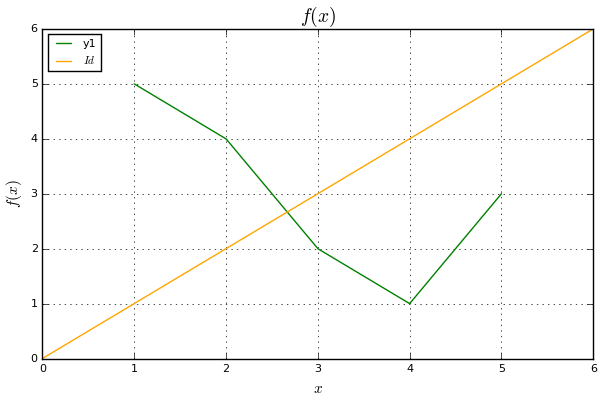

In [30]:
#Gráfica m=2
plot(vx, vy, c=:green, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

In [31]:
(x2,y2)=graphit(2,500,2);


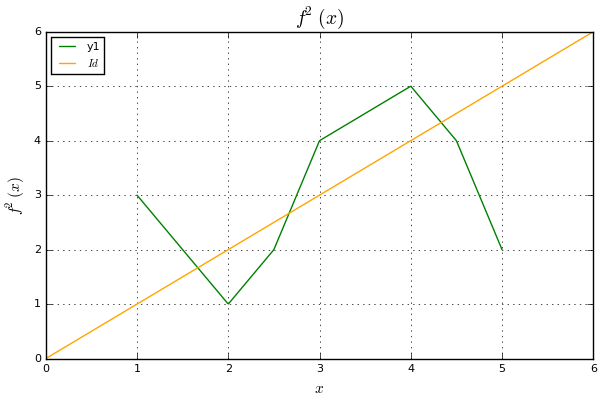

In [32]:
#Gráfica para m=2 y f^2
plot(x2, y2, c=:green, title=L" f^2(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f^2(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

Estos son los puntos de periodo 2

In [33]:
(x3,y3)=graphit(2,500,3)

([1.0,1.00802,1.01603,1.02405,1.03206,1.04008,1.0481,1.05611,1.06413,1.07214  …  4.92786,4.93587,4.94389,4.9519,4.95992,4.96794,4.97595,4.98397,4.99198,5.0],[2.0,2.03206,2.06413,2.09619,2.12826,2.16032,2.19238,2.22445,2.25651,2.28858  …  3.42285,3.48697,3.5511,3.61523,3.67936,3.74349,3.80762,3.87174,3.93587,4.0])


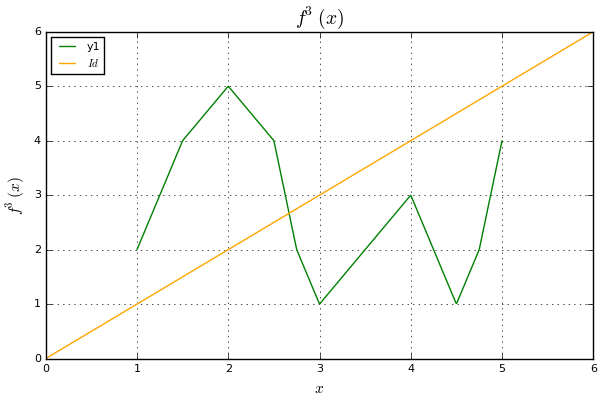

In [34]:
#Gráfica para m=2 y f^3
plot(x3, y3, c=:green, title=L" f^3(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f^3(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

Este podría ser un punto de periodo 3.

In [35]:
(x4,y4)=graphit(2,500,4);


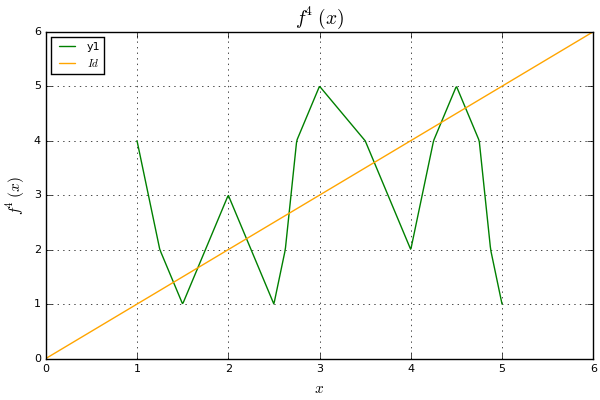

In [36]:
#Gráfica para m=2 y f^4
plot(x4, y4, c=:green, title=L" f^4(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f^4(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

In [37]:
(x5,y5)=graphit(2,500,5);


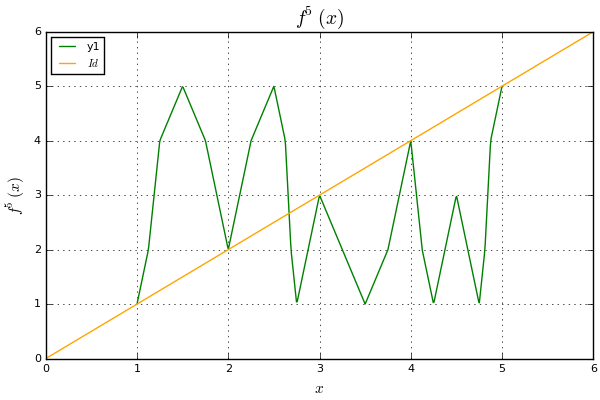

In [38]:
#Gráfica para m=2 y f^5
plot(x5, y5, c=:green, title=L" f^5(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f^5(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

In [39]:
(x6,y6)=graphit(2,500,6);


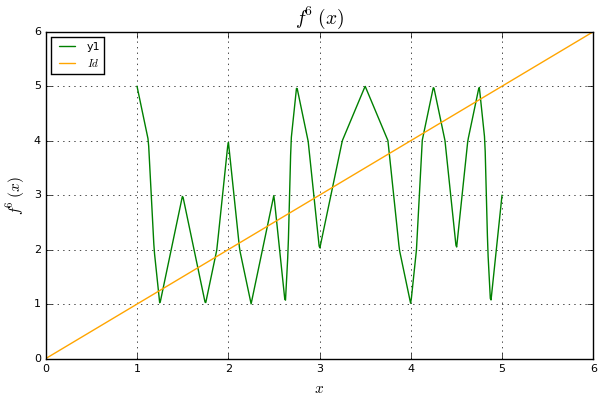

In [40]:
#Gráfica para m=2 y f^6
plot(x6, y6, c=:green, title=L" f^6(x)", xlabel=L"x") 
plot!(xi, yi, color=:orange, label=L"Id")
ylabel!(L"f^6(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)


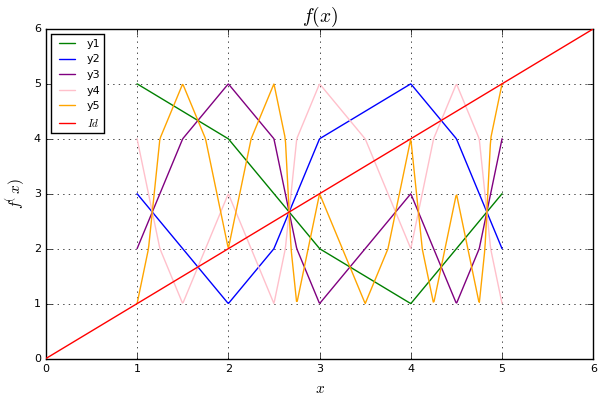

In [67]:
#Gráfica para m=2 y f's
plot(vx, vy, c=:green, title=L" f(x)", xlabel=L"x")
plot!(x2, y2, c=:blue, title=L" f(x)", xlabel=L"x")
plot!(x3, y3, c=:purple, title=L" f(x)", xlabel=L"x")
plot!(x4, y4, c=:pink, title=L" f(x)", xlabel=L"x") 
plot!(x5, y5, c=:orange, title=L" f(x)", xlabel=L"x")
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^(x) ")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)


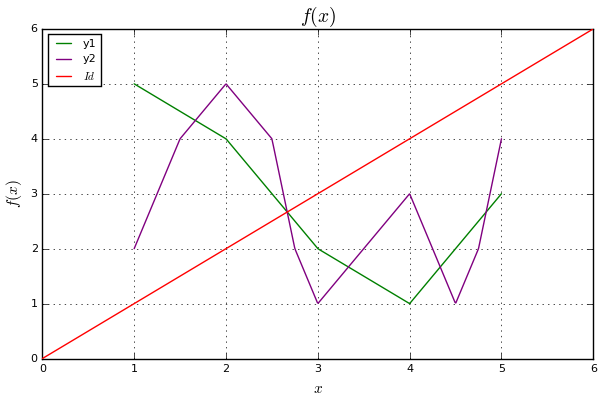

In [73]:
#Gráfica con m=2  de f(x) y f^3(x)

plot(vx, vy, c=:green, title=L" f(x)", xlabel=L"x")
plot!(x3, y3, c=:purple, title=L" f(x)", xlabel=L"x")
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f(x)")
xlims!(0.0, 6.0)
ylims!(0.0, 6.0)

El punto de "periodo 3" es en realidad el punto fijo de la función.  
Por lo que no existe algún punto de periodo 3.

### Periodo 7 *no* implica periodo 5 ni periodo 3

Se usa $m = 3$, el rango entonces será $I=[1,2m + 1]$,  
es decir, $I=[1,7]$

In [43]:
#Prueba función graphit m=3
(vx7,vy7) = graphit(3, 1000, 1);


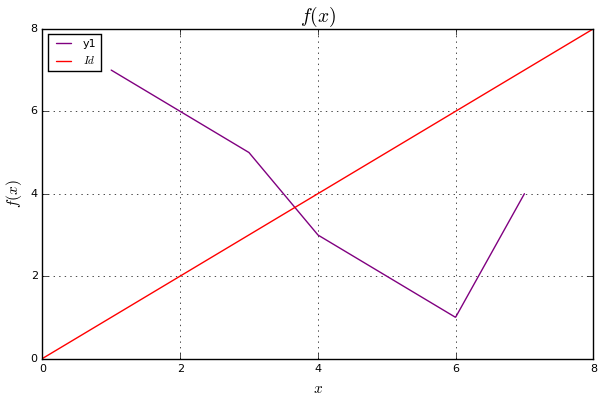

In [44]:
#Gráfica de f(x) con m=3

plot(vx7, vy7, c=:purple, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

In [45]:
#Prueba órbita de periodo... 7
functlin(3,functlin(3,(functlin(3,functlin(3,functlin(3,functlin(3,functlin(3,1.0))))))))

1.0

In [46]:
#Otra prueba órbita de periodo... 7
functlin(3,functlin(3,(functlin(3,functlin(3,functlin(3,functlin(3,functlin(3,7.0))))))))

7.0

In [47]:
#Prueba función graphit m=3
(vx7,vy7) = graphit(3, 1000, 1);

In [48]:

(vx72,vy72) = graphit(3, 1000, 2);


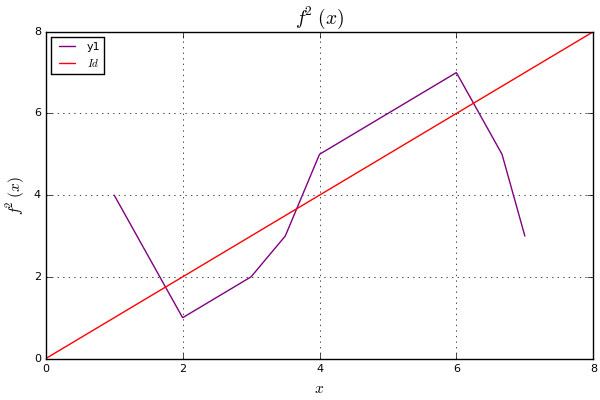

In [49]:
#Gráfica de f^2(x) con m=3 

plot(vx72, vy72, c=:purple, title=L"f^2(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^2(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

In [50]:
(vx73,vy73) = graphit(3, 1000, 3);


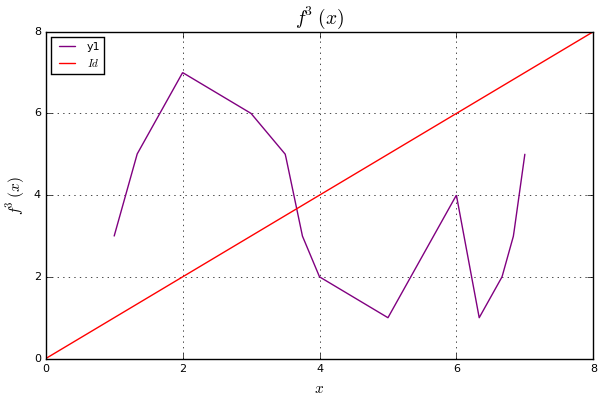

In [51]:
#Gráfica de f^3(x) con m=3 

plot(vx73, vy73, c=:purple, title=L"f^3(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^3(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

In [52]:
(vx74,vy74) = graphit(3, 1000, 4);


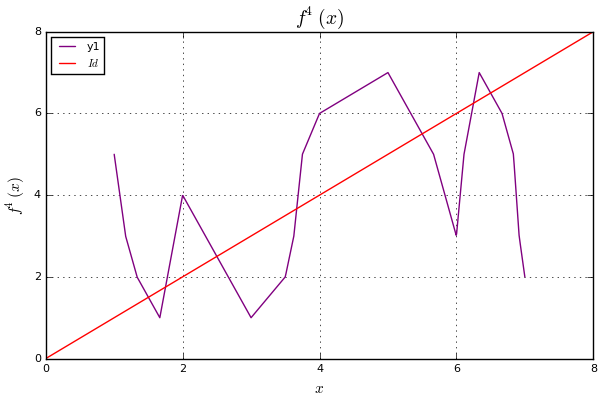

In [53]:
#Gráfica de f^4(x) con m=3 

plot(vx74, vy74, c=:purple, title=L"f^4(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^4(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

In [54]:
(vx75,vy75) = graphit(3, 1000, 5);


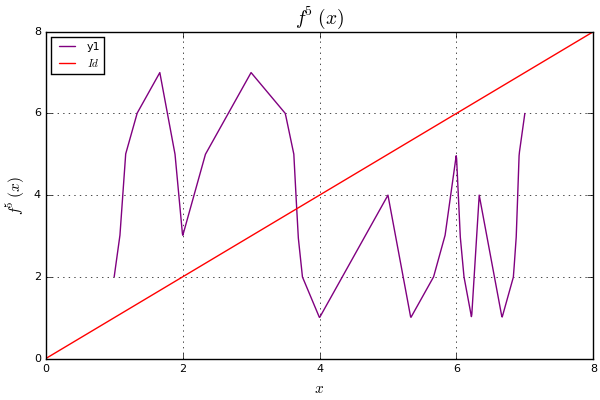

In [55]:
#Gráfica de f^5(x) con m=3 

plot(vx75, vy75, c=:purple, title=L"f^5(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^5(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

In [56]:
(vx76,vy76) = graphit(3, 1000, 6);


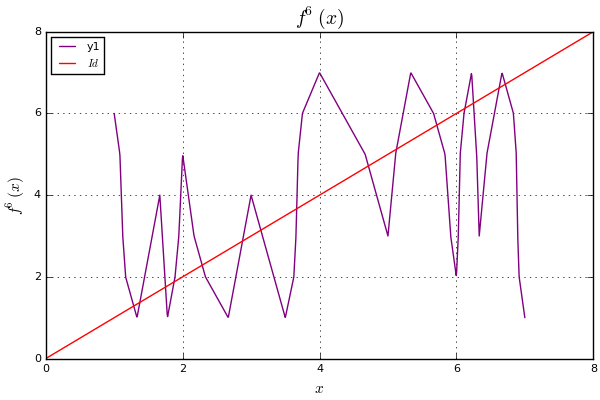

In [57]:
#Gráfica de f^6(x) con m=3 
plot(vx76, vy76, c=:purple, title=L"f^6(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^6(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)


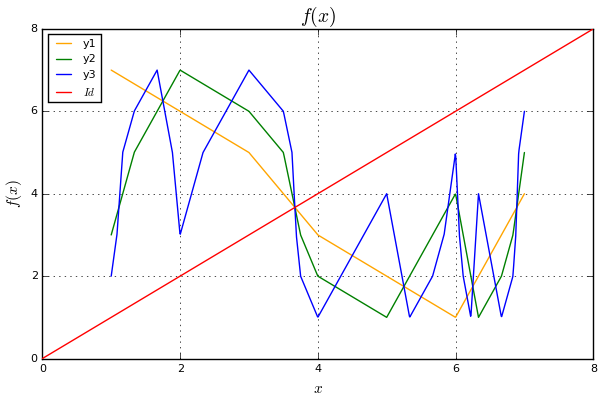

In [58]:
#Gráfica de f(x), f^3(x) y f^5(x)  
plot(vx7, vy7, c=:orange, title=L"f^3(x)", xlabel=L"x")
plot!(vx73, vy73, c=:green, title=L"f^3(x)", xlabel=L"x")
plot!(vx75, vy75, c=:blue, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f(x)")
xlims!(0.0, 8.0)
ylims!(0.0, 8.0)

No tiene puntos de periodo 3 y 5.

### Periodo 3 implica todos los periodos

Se usa $m = 1$, el rango entonces será   
$I=[1,2m + 1]$, es decir, $I=[1,3]$

In [59]:
(vx31,vy31) = graphit(1, 1000, 1);


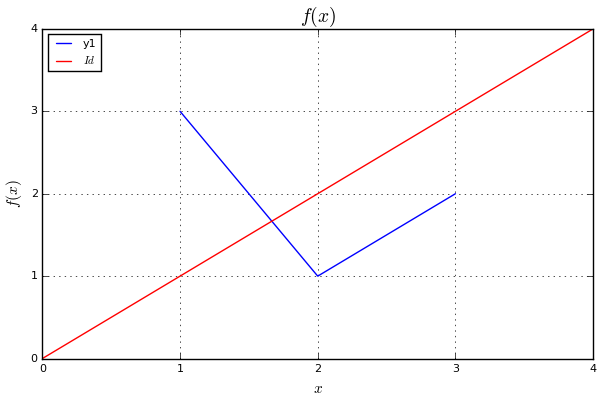

In [60]:
#Gráfica m=1, f(x)
plot(vx31, vy31, c=:blue, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f(x)")
xlims!(0.0, 4.0)
ylims!(0.0, 4.0)

In [61]:
(vx32,vy32) = graphit(1, 1000, 2);


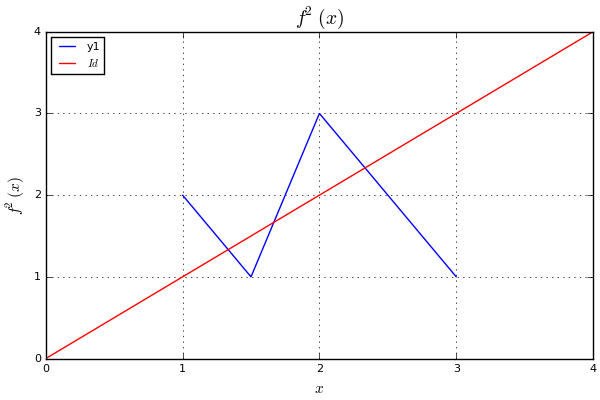

In [62]:
#Gráfica m=1
plot(vx32, vy32, c=:blue, title=L"f^2(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^2(x)")
xlims!(0.0, 4.0)
ylims!(0.0, 4.0)

In [63]:
(vx33,vy33) = graphit(1, 1000, 3);


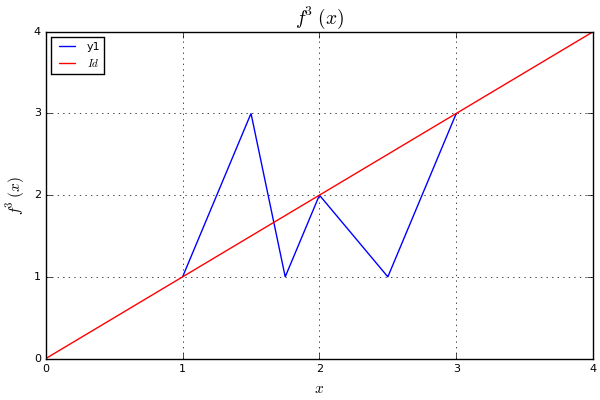

In [64]:
#Gráfica m=1
plot(vx33, vy33, c=:blue, title=L"f^3(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f^3(x)")
xlims!(0.0, 4.0)
ylims!(0.0, 4.0)


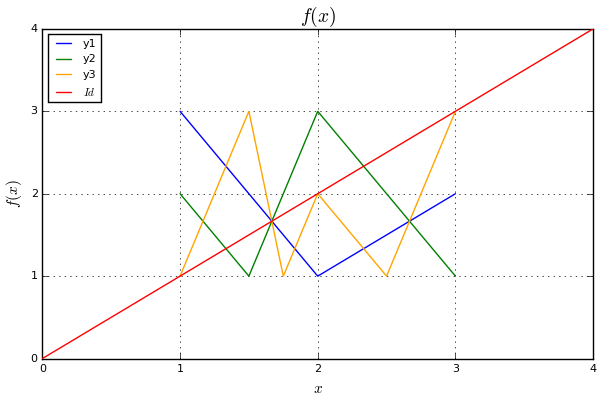

In [65]:
#Gráfica m=1
plot(vx31, vy31, c=:blue, title=L"f(x)", xlabel=L"x") 
plot!(vx32, vy32, c=:green, title=L"f(x)", xlabel=L"x") 
plot!(vx33, vy33, c=:orange, title=L"f(x)", xlabel=L"x") 
plot!(xi, yi, color=:red, label=L"Id")
ylabel!(L"f(x)")
xlims!(0.0, 4.0)
ylims!(0.0, 4.0)

### Periodo 2 implica periodo 1

Se usa $m = 1$, el rango entonces será   
$I=[1,2*m + 1]$, es decir, $I=[1,3]$

In [66]:
function orb(f::Function, x0::Float64, n::Int64)

    #y = f(x0)
    
    ox = Float64[]
    oy = Float64[]
    
    push!(ox, x0)
    push!(oy, 0)

    for i in 1:n
        
       
        push!(ox, x0)
        y = f(x0)
        push!(oy, y)
        
        push!(ox,y)
        push!(oy,y)
        x0 = y
    end
        return ox, oy
end

orb (generic function with 1 method)

##### Referencias

"A First Course in Chaotic Dynamical Systems". Devaney Robert  
"Sistemas Dinámicos Discretos". King Jefferson, Méndez Héctor